# Exploratory Data Analysis: NASA Asteroids - NeoWs(Near Earth Object Webservice)

Exploratory data analysis is a process for exploring datasets, answering questions, and visualizing results. We used Pandas, a powerful library for working with data and other Python libraries including NumPy,StatsModels and Matplotlib for visualization.

In [1]:
#Importing our api_key
from api_key import api_key

In [2]:
# Importing all necessary libraries

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from datetime import datetime
import api_key

In [4]:
#implementing base url and printing jsondata to check what are the parameters we have.

base_url = "https://api.nasa.gov/neo/rest/v1/feed?start_date=2021-10-22&end_date=2021-10-22&api_key=oZMj9ugDHdPXcNimvzMjyhFMwvyHDm6K1RwhLyjV"
req = requests.get(base_url)
asteroid_date=req.json()
asteroid_date

{'links': {'next': 'http://www.neowsapp.com/rest/v1/feed?start_date=2021-10-23&end_date=2021-10-23&detailed=false&api_key=oZMj9ugDHdPXcNimvzMjyhFMwvyHDm6K1RwhLyjV',
  'prev': 'http://www.neowsapp.com/rest/v1/feed?start_date=2021-10-21&end_date=2021-10-21&detailed=false&api_key=oZMj9ugDHdPXcNimvzMjyhFMwvyHDm6K1RwhLyjV',
  'self': 'http://www.neowsapp.com/rest/v1/feed?start_date=2021-10-22&end_date=2021-10-22&detailed=false&api_key=oZMj9ugDHdPXcNimvzMjyhFMwvyHDm6K1RwhLyjV'},
 'element_count': 19,
 'near_earth_objects': {'2021-10-22': [{'links': {'self': 'http://www.neowsapp.com/rest/v1/neo/3553061?api_key=oZMj9ugDHdPXcNimvzMjyhFMwvyHDm6K1RwhLyjV'},
    'id': '3553061',
    'neo_reference_id': '3553061',
    'name': '(2010 XU10)',
    'nasa_jpl_url': 'http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3553061',
    'absolute_magnitude_h': 27.4,
    'estimated_diameter': {'kilometers': {'estimated_diameter_min': 0.0088014652,
      'estimated_diameter_max': 0.0196806745},
     'meters': {'estimated_dia

In [5]:
#This function returns the list of asteroids & its parameters in json format between the start & end date passed 

def JasonData(startDate,endDate):
    base_url = "https://api.nasa.gov/neo/rest/v1/feed?start_date="+startDate+"&end_date="+endDate+"&api_key=oZMj9ugDHdPXcNimvzMjyhFMwvyHDm6K1RwhLyjV"
    req = requests.get(base_url)
    return req.json()

# It will be very easy to find dataframe from dictionary. So we created a dictionary named nasa_asteriod to save the 
# parameters.Passing the json data retrived from the function "JasonData" to below method to create a Dictionary and dataframe.

def createDictionary(asteroid_data):
    
# Using for loops to go loop through the list and add to dictionary
 
    for i in asteroid_data['near_earth_objects']:
    
    # Handled try and except method
    
        try:
            if i !=0:
                print('Found Asteriods in this Date: ',i)
            
            for j in asteroid_data['near_earth_objects'][i]:
                nasa_asteroid['neo_reference_id'].append(j['neo_reference_id'])
                nasa_asteroid['asteriod_name'].append(j['name'])
                nasa_asteroid['absolute_magnitude'].append(j['absolute_magnitude_h'])
                nasa_asteroid['estimated_diameter_min(feet)'].append(j['estimated_diameter']['feet']['estimated_diameter_min'])
                nasa_asteroid['estimated_diameter_max(feet)'].append(j['estimated_diameter']['feet']['estimated_diameter_max'])
                nasa_asteroid['is_potentially_hazardous_asteroid'].append(j['is_potentially_hazardous_asteroid'])
                for k in j['close_approach_data']:
                    nasa_asteroid['close_approach_date_time'].append(k['close_approach_date'])
                    nasa_asteroid['miss_distance(astronomical)'].append(k['miss_distance']['astronomical'])
                    nasa_asteroid['relative_velocity(km_per_second)'].append(k['relative_velocity']['kilometers_per_second'])
                    nasa_asteroid['relative_velocity(km_per_hour)'].append(k['relative_velocity']['kilometers_per_hour'])
        except:
            print('There is no asteriod this day')

nasa_asteroid={'neo_reference_id':[],
               'asteriod_name': [],
               'absolute_magnitude':[],
               'estimated_diameter_min(feet)':[],
               'estimated_diameter_max(feet)':[],
               'is_potentially_hazardous_asteroid': [],
               'close_approach_date_time':[],
               'relative_velocity(km_per_second)':[],
               'relative_velocity(km_per_hour)':[],
               'miss_distance(astronomical)':[],
                }


createDictionary(JasonData("2021-10-01","2021-10-08"))
createDictionary(JasonData("2021-10-09","2021-10-16"))
createDictionary(JasonData("2021-10-17","2021-10-24"))
createDictionary(JasonData("2021-10-25","2021-10-31"))


nasa_asteroid_df=pd.DataFrame(nasa_asteroid)
nasa_asteroid_df

Found Asteriods in this Date:  2021-10-01
Found Asteriods in this Date:  2021-10-06
Found Asteriods in this Date:  2021-10-07
Found Asteriods in this Date:  2021-10-08
Found Asteriods in this Date:  2021-10-02
Found Asteriods in this Date:  2021-10-03
Found Asteriods in this Date:  2021-10-04
Found Asteriods in this Date:  2021-10-05
Found Asteriods in this Date:  2021-10-10
Found Asteriods in this Date:  2021-10-11
Found Asteriods in this Date:  2021-10-12
Found Asteriods in this Date:  2021-10-09
Found Asteriods in this Date:  2021-10-13
Found Asteriods in this Date:  2021-10-14
Found Asteriods in this Date:  2021-10-15
Found Asteriods in this Date:  2021-10-16
Found Asteriods in this Date:  2021-10-20
Found Asteriods in this Date:  2021-10-21
Found Asteriods in this Date:  2021-10-22
Found Asteriods in this Date:  2021-10-23
Found Asteriods in this Date:  2021-10-17
Found Asteriods in this Date:  2021-10-18
Found Asteriods in this Date:  2021-10-19
Found Asteriods in this Date:  202

,neo_reference_id,asteriod_name,absolute_magnitude,estimated_diameter_min(feet),estimated_diameter_max(feet),is_potentially_hazardous_asteroid,close_approach_date_time,relative_velocity(km_per_second),relative_velocity(km_per_hour),miss_distance(astronomical)
0,2138893,138893 (2000 YH66),18.060,2130.786948,4764.584461,False,2021-10-01,17.1713276053,61816.7793791534,0.4326044721
1,2386504,386504 (2009 BP58),18.700,1586.865170,3548.338390,False,2021-10-01,17.1073615748,61586.5016692091,0.2124389233
2,3607823,(2012 QL14),24.400,114.958219,257.054393,False,2021-10-01,22.4017287306,80646.2234302525,0.3300126047
3,3636861,(2013 JE1),19.200,1260.491809,2818.545370,False,2021-10-01,21.3341866669,76803.0720007954,0.1768958604
4,3638335,(2013 JV17),27.800,24.018176,53.706275,False,2021-10-01,8.6677101656,31203.7565962957,0.475078485
...,...,...,...,...,...,...,...,...,...,...
610,54213624,(2021 UM4),27.717,24.953992,55.798822,False,2021-10-27,16.3459104967,58845.2777880318,0.0069542109
611,54213627,(2021 UO4),26.289,48.165939,107.702313,False,2021-10-27,8.2046493919,29536.7378108744,0.041210966
612,54214061,(2021 UF6),25.805,60.192174,134.593792,False,2021-10-27,19.4243665267,69927.7194962611,0.0314516437
613,54214722,(2021 UA7),28.738,15.593372,34.867839,False,2021-10-27,27.7716742743,99978.0273874292,0.0008569185


In [6]:
#printing values for nasa_asteriod
print(nasa_asteroid)

{'neo_reference_id': ['2138893', '2386504', '3607823', '3636861', '3638335', '3829425', '3831475', '54196397', '54200468', '54201824', '54202334', '54204646', '54204656', '2264357', '2365424', '2503871', '2537342', '3014184', '3288934', '3386134', '3602702', '3761267', '3799312', '3831202', '54076927', '54195890', '54199807', '54201817', '54202344', '54202993', '54203033', '54204649', '54204650', '54204651', '54204653', '54206540', '54206546', '54215643', '2162694', '2363027', '3729141', '3753621', '3774099', '3775206', '3837881', '3872646', '54017662', '54137802', '54144234', '54185580', '54200440', '54201813', '54202995', '54204648', '54206543', '54208045', '54208623', '54209295', '54209297', '54209298', '54210929', '54215212', '3036044', '3732894', '3831166', '3869331', '54016461', '54016667', '54185140', '54193831', '54200293', '54200438', '54206544', '54208624', '54209300', '54210295', '2533372', '3789115', '3799247', '3989315', '54145576', '54190789', '54203037', '54203013', '542

# Data Cleaning
Before using our dataframe, we can check whether dataframe has null values.

In [7]:
nasa_asteroid_df.isnull()

,neo_reference_id,asteriod_name,absolute_magnitude,estimated_diameter_min(feet),estimated_diameter_max(feet),is_potentially_hazardous_asteroid,close_approach_date_time,relative_velocity(km_per_second),relative_velocity(km_per_hour),miss_distance(astronomical)
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
610,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False
613,False,False,False,False,False,False,False,False,False,False


In [8]:
# we can check whether all columns have equal number of rows.
nasa_asteroid_df.count()    

neo_reference_id                     615
asteriod_name                        615
absolute_magnitude                   615
estimated_diameter_min(feet)         615
estimated_diameter_max(feet)         615
is_potentially_hazardous_asteroid    615
close_approach_date_time             615
relative_velocity(km_per_second)     615
relative_velocity(km_per_hour)       615
miss_distance(astronomical)          615
dtype: int64

In [9]:
# Interpolation is mostly used to impute missing values in the dataframe or series while preprocessing data.
nasa_asteroid_df.interpolate()

,neo_reference_id,asteriod_name,absolute_magnitude,estimated_diameter_min(feet),estimated_diameter_max(feet),is_potentially_hazardous_asteroid,close_approach_date_time,relative_velocity(km_per_second),relative_velocity(km_per_hour),miss_distance(astronomical)
0,2138893,138893 (2000 YH66),18.060,2130.786948,4764.584461,False,2021-10-01,17.1713276053,61816.7793791534,0.4326044721
1,2386504,386504 (2009 BP58),18.700,1586.865170,3548.338390,False,2021-10-01,17.1073615748,61586.5016692091,0.2124389233
2,3607823,(2012 QL14),24.400,114.958219,257.054393,False,2021-10-01,22.4017287306,80646.2234302525,0.3300126047
3,3636861,(2013 JE1),19.200,1260.491809,2818.545370,False,2021-10-01,21.3341866669,76803.0720007954,0.1768958604
4,3638335,(2013 JV17),27.800,24.018176,53.706275,False,2021-10-01,8.6677101656,31203.7565962957,0.475078485
...,...,...,...,...,...,...,...,...,...,...
610,54213624,(2021 UM4),27.717,24.953992,55.798822,False,2021-10-27,16.3459104967,58845.2777880318,0.0069542109
611,54213627,(2021 UO4),26.289,48.165939,107.702313,False,2021-10-27,8.2046493919,29536.7378108744,0.041210966
612,54214061,(2021 UF6),25.805,60.192174,134.593792,False,2021-10-27,19.4243665267,69927.7194962611,0.0314516437
613,54214722,(2021 UA7),28.738,15.593372,34.867839,False,2021-10-27,27.7716742743,99978.0273874292,0.0008569185


It seems like our dataframe has no null values and missing rows or columns, no missing values, no weird symbols. So now we can start calculating statistics to the dataframe.

# Summary Statistics


In [10]:
# All in one go
# Calculating few statistics like mean,median,standard deviation are very important to explore our data. In pandas library
# we have .describe() method to calculate all together in a dataframe. Quantile(50%) can be used to split up the data into 
# some number of equal parts. Quantile is also called median.  We can split the dats into four equal parts which is called 
# Quartiles(25%). 

nasa_asteroid_df.describe()

,absolute_magnitude,estimated_diameter_min(feet),estimated_diameter_max(feet)
count,615.000000,615.000000,615.000000
mean,24.356052,270.213206,604.215097
std,2.756811,458.018955,1024.161519
min,16.400000,3.827719,8.559039
25%,22.400000,47.779541,106.838302
50%,24.636000,103.119317,230.581803
75%,26.306500,288.761991,645.691442
max,31.788000,4576.569140,10233.519702


# Visualizing Near Earth Asteriods Data
Visualizing data is the most important process in an exploratory analysis. 

# Question 1
How many asteriods came near to earth in the month of october 2021?


In [11]:
nasa_asteroid_df['neo_reference_id'].count()

615

### Histogram

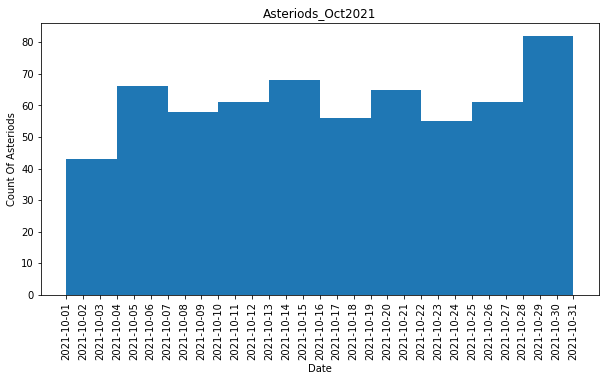

In [12]:
# we already imported seaborn and matplotlib, so we can start plotting our plots.

fig,ax = plt.subplots(figsize =(10, 5))
# plotting histogram to show how many asteriods came near to earth each day in the october month 2021

ax.hist(nasa_asteroid_df['close_approach_date_time'].sort_values())

# Rotating the x ticks for easier visualization
plt.xticks(rotation=90)

# Set the x-axis label to "Date"
ax.set_xlabel('Date')

# Set the y-axis label to "Count Of Asteriods"
ax.set_ylabel("Count Of Asteriods")

# giving title to the plot
ax.set_title("Asteriods_Oct2021")

# displaying image
plt.show()

### Pie plot

Text(0.5, 1.0, 'Asteriods_Oct2021')

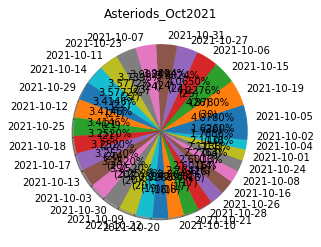

In [17]:
# plotting pie plot to show how many asteriods came near to earth each day in the october month 2021
def my_fmt(x):
    return '{:.4f}%\n({:.0f})'.format(x, total1*x/100)
val_counts = nasa_asteroid_df['close_approach_date_time'].value_counts()
total1 = len(nasa_asteroid_df['close_approach_date_time'])
fig = plt.figure()
plt.pie(val_counts, labels=val_counts.index,autopct=my_fmt,shadow=True);
# giving title to the plot
plt.title('Asteriods_Oct2021')

### Countplot

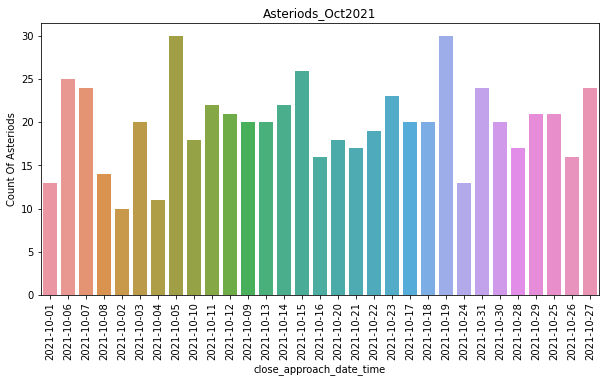

In [18]:
fig,ax = plt.subplots(figsize =(10, 5))
# plotting countplot to show how many asteriods came near to earth each day in the october month 2021
sns.countplot(x='close_approach_date_time',data=nasa_asteroid_df)

# Rotating the x ticks for easier visualization
plt.xticks(rotation=90)

# Set the y-axis label to "Count Of Asteriods"
plt.ylabel("Count Of Asteriods")

# giving title to the plot
plt.title('Asteriods_Oct2021')

plt.show()

# Observation
There are 615 asteriods came closer to earth in october month 2021. Even though we got couple more plots for our data, count plot explains very clearly that every day in october we had asteriods came closer to earth. X axis shows respective dates and y axis shows number of asteriods each day.

# Question 2
How many asteriods are potentially hazardous during the calculated period?

In [19]:
nasa_asteroid_df['is_potentially_hazardous_asteroid'].value_counts()

False    575
True      40
Name: is_potentially_hazardous_asteroid, dtype: int64

### Count plot

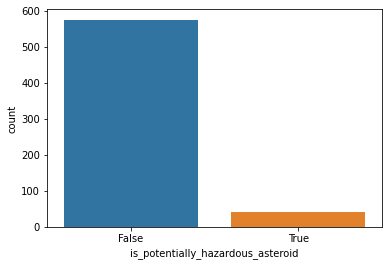

In [21]:
# plotting countplot to show how many asteriods are potentially hazardous and how many are not.
sns.countplot(x='is_potentially_hazardous_asteroid',data=nasa_asteroid_df)
# Set the x-axis label to "True or False"
ax.set_xlabel('True or False')
# Set the y-axis label to "Count Of Asteriods"
ax.set_ylabel("Count Of Asteriods")
# giving title to the plot
ax.set_title("potentially_hazardous_asteroid")
plt.show()

### Pie plot

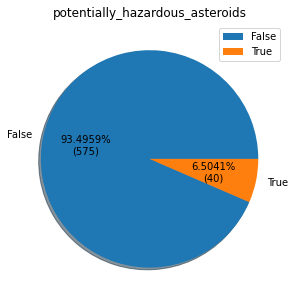

In [63]:
# plotting pie plot to show how many asteriods are potentially hazardous and how many are not.
def my_fmt(x):
    return '{:.4f}%\n({:.0f})'.format(x, total*x/100)
v_counts = nasa_asteroid_df['is_potentially_hazardous_asteroid'].value_counts()
total = len(nasa_asteroid_df['is_potentially_hazardous_asteroid'])
fig = plt.figure()
plt.pie(v_counts, labels=v_counts.index,autopct=my_fmt,shadow=True);
plt.title("potentially_hazardous_asteroids")
plt.legend()

### Bar plot

Text(0.5, 1.0, 'potentially_hazardous_asteroid')

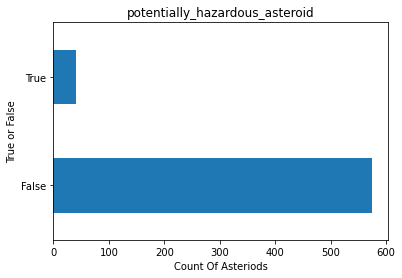

In [20]:
# plotting bar plot to show how many asteriods are potentially hazardous and how many are not.
nasa_asteroid_df['is_potentially_hazardous_asteroid'].value_counts().plot(kind="barh")
# Set the x-axis label to "Count Of Asteriods"
plt.xlabel('Count Of Asteriods')

# Set the y-axis label to "True or False"
plt.ylabel("True or False")

# giving title to the plot
plt.title("potentially_hazardous_asteroid")

# Observation
Among 615 asteriods, 40 are potentially hazardous and 575 are not potentially hazardous asteriods. 
#### Pie plots explain better than other plots. We are able see the count and percentage of asteriods inside pie plot.

# Correlation
Correlation tells us how strong the relationship is between the variables. We have calculated correlation between absolute_magnitude and estimated_diameter_feet_min.

In [22]:
nasa_asteroid_df['absolute_magnitude'].corr(nasa_asteroid_df['estimated_diameter_min(feet)'])

-0.7580227879768089

Text(0.5, 1.0, 'Correlation Between absolute magnitude and minimum estimated diameter(feet)')

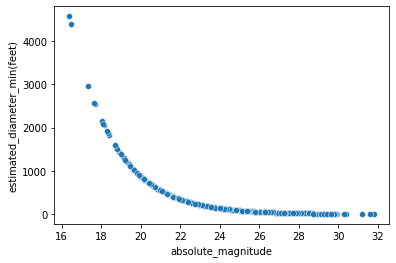

In [23]:
# using scatterplot showing the negative correlation between absolute magnitude and minimum estimated diameter(feet)
sns.scatterplot(x='absolute_magnitude',y='estimated_diameter_min(feet)',data=nasa_asteroid_df)

# giving title to the plot
ax.set_title('Correlation Between absolute magnitude and minimum estimated diameter(feet)')

# Observation
We should always visualize correlation even though we have calculated using .corr() function. Graph shows that as x increases,
y decreases. Its called negative correlation. 

# SUMMARY
We have imported our api key for NASA Asteroids - NeoWs(Near Earth Object Webservice). 

We retrieved json data from the base url.

We don't want to use all of the parameters. So created a dictionary with few parameters and converted into dataframe.

Checked our dataframe, whether it has any null values, missing values, weird symbols.

Calculated few statistics mean, median,correlation,standard deviation,quantiles.

We have found how many asteroids came closer to earth in october month 2021.

And during that period, calculated how many are potentially hazardous and not potentially hazardous.

Plot graphs using matplotlib, seaborn.


